In [54]:
import os
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, r2_score

from sklearn.preprocessing import StandardScaler

from keras.models import load_model

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.display.max_columns = None

In [33]:
df_stat_ML = pd.read_hdf('champ_clean_not_scaled.h5')
df_stat_ML = df_stat_ML.drop(['game_id', 'team', 'goals', 'game_duration_diff', 
                              'goals_diff', 'assists_diff', 'shots_diff', 'saves_diff', 
                              'assists', 'score_diff', 'demos_taken_diff'], axis=1)
y = df_stat_ML['win']
X = df_stat_ML.drop('win', axis=1)

In [34]:
X.head()

,game_duration,score,saves,shots,bpm,amount_collected,amount_collected_big_pads,amount_collected_small_pads,count_collected_big_pads,count_collected_small_pads,amount_stolen,amount_stolen_big_pads,amount_stolen_small_pads,count_stolen_big_pads,count_stolen_small_pads,0_boost_time,avg_speed,total_distance,time_slow_speed,time_boost_speed,time_supersonic_speed,time_on_ground,time_low_in_air,time_high_in_air,avg_distance_to_ball,avg_distance_to_ball_has_possession,avg_distance_to_ball_no_possession,time_behind_ball,time_in_front_of_ball,time_defensive_half,time_offensive_half,time_defensive_third,time_neutral_third,time_offensive_third,demos_inflicted,demos_taken,bpm_diff,amount_collected_diff,amount_collected_big_pads_diff,amount_collected_small_pads_diff,count_collected_big_pads_diff,count_collected_small_pads_diff,amount_stolen_diff,amount_stolen_big_pads_diff,amount_stolen_small_pads_diff,count_stolen_big_pads_diff,count_stolen_small_pads_diff,0_boost_time_diff,avg_speed_diff,total_distance_diff,time_slow_speed_diff,time_boost_speed_diff,time_supersonic_speed_diff,time_on_ground_diff,time_low_in_air_diff,time_high_in_air_diff,avg_distance_to_ball_diff,avg_distance_to_ball_has_possession_diff,avg_distance_to_ball_no_possession_diff,time_behind_ball_diff,time_in_front_of_ball_diff,time_defensive_half_diff,time_offensive_half_diff,time_defensive_third_diff,time_neutral_third_diff,time_offensive_third_diff,demos_inflicted_diff
0,458.0,554.000000,0.333333,4.000000,407.000000,2594.333333,1275.666667,1318.666667,29.000000,50.000000,554.000000,183.000000,371.000000,4.000000,12.000000,43.680000,1569.000000,562555.666667,172.870000,171.836667,55.246667,226.233333,156.923333,16.796667,3227.000000,3160.333333,3349.666667,299.103333,100.85,249.120000,150.833333,176.430000,128.640000,94.883333,0.333333,0.333333,76.666667,355.000000,423.666667,-68.666667,7.333333,-6.0,-232.333333,-42.666667,-189.666667,-2.333333,-8.666667,1.760000,122.333333,43895.666667,-38.663333,17.256667,21.443333,-18.923333,12.983333,5.976667,269.0,125.666667,469.333333,23.036667,-23.000000,-43.770000,43.810000,-45.39,0.35,45.073333,0.0
1,458.0,330.333333,1.333333,1.333333,330.333333,2239.333333,852.000000,1387.333333,21.666667,56.000000,786.333333,225.666667,560.666667,6.333333,20.666667,41.920000,1446.666667,518660.000000,211.533333,154.580000,33.803333,245.156667,143.940000,10.820000,2958.000000,3034.666667,2880.333333,276.066667,123.85,292.890000,107.023333,221.820000,128.290000,49.810000,0.333333,0.333333,-76.666667,-355.000000,-423.666667,68.666667,-7.333333,6.0,232.333333,42.666667,189.666667,2.333333,8.666667,-1.760000,-122.333333,-43895.666667,38.663333,-17.256667,-21.443333,18.923333,-12.983333,-5.976667,-269.0,-125.666667,-469.333333,-23.036667,23.000000,43.770000,-43.810000,45.39,-0.35,-45.073333,0.0
2,393.0,293.000000,2.000000,1.333333,414.333333,2271.333333,1150.000000,1121.333333,16.666667,49.666667,456.333333,134.666667,321.666667,2.000000,13.666667,52.833333,1508.666667,468653.666667,163.346667,126.136667,46.946667,204.176667,123.816667,8.433333,2443.666667,2244.000000,2568.666667,221.570000,114.86,209.313333,127.120000,158.243333,99.946667,78.240000,0.333333,0.333333,117.666667,635.666667,112.333333,523.333333,2.000000,16.0,132.333333,8.333333,124.000000,-1.000000,3.666667,18.090000,157.666667,54258.000000,-42.186667,17.320000,24.766667,-14.363333,16.350000,-2.093333,-479.0,-833.333333,-97.333333,-25.236667,25.130000,-18.726667,18.626667,-15.15,1.69,13.350000,0.0
3,393.0,510.333333,0.333333,4.666667,296.666667,1635.666667,1037.666667,598.000000,14.666667,33.666667,324.000000,126.333333,197.666667,3.000000,10.000000,34.743333,1351.000000,414395.666667,205.533333,108.816667,22.180000,218.540000,107.466667,10.526667,2922.666667,3077.333333,2666.000000,246.806667,89.73,228.040000,108.493333,173.393333,98.256667,64.890000,0.333333,0.333333,-117.666667,-635.666667,-112.333333,-523.333333,-2.000000,-16.0,-132.333333,-8.333333,-124.000000,1.000000,-3.666667,-

In [35]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: win, dtype: int64

In [36]:
scaler = StandardScaler().fit(X)

In [37]:
X[X.columns] = scaler.transform(X)

In [38]:
y = y.values

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [40]:
X_test.shape

(3783, 67)

In [10]:
# Random Forest Classifier

rand_forest_clf = RandomForestClassifier(n_estimators=100)
rand_forest_clf = rand_forest_clf.fit(X_train, y_train)
rand_forest_predictions = cross_val_predict(rand_forest_clf, X_test, y_test, cv=6)
rand_forest_accuracy = r2_score(y_test, rand_forest_predictions)
print(rand_forest_accuracy)

0.4047052187786143


In [11]:
# XGBoost Classifier

xgbCla = XGBClassifier(n_jobs=4)
xgbCla.fit(X_train, y_train, verbose=True)

xgb_predictions = cross_val_predict(xgbCla, X_test, y_test, cv=6)
xgb_accuracy = r2_score(y_test, xgb_predictions)
print(xgb_accuracy)   #r^2

0.529473929585228


In [12]:
# Linear SVC Classifier

linear_svc_clf = LinearSVC(random_state=0, tol=1e-5, max_iter=2000)
linear_svc_clf.fit(X_train, y_train)

linear_svc_predictions = cross_val_predict(linear_svc_clf, X_test, y_test, cv=6)
linear_svc_accuracy = r2_score(y_test, linear_svc_predictions)
print(linear_svc_accuracy) 

/home/max/anaconda3/envs/Machine_Learning/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/max/anaconda3/envs/Machine_Learning/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/max/anaconda3/envs/Machine_Learning/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/max/anaconda3/envs/Machine_Learning/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/max/anaconda3/envs/Machine_Learning/lib/python3.6/site-packages/sklear

0.6478984686559122


/home/max/anaconda3/envs/Machine_Learning/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [13]:
# SVC Classifier

svc_clf = SVC(random_state=0, tol=1e-5)
svc_clf.fit(X_train, y_train)

svc_predictions = cross_val_predict(svc_clf, X_test, y_test, cv=6)
svc_accuracy = r2_score(y_test, svc_predictions)
print(svc_accuracy) 

/home/max/anaconda3/envs/Machine_Learning/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/max/anaconda3/envs/Machine_Learning/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/max/anaconda3/envs/Machine_Learning/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning

0.5072693285094747


In [14]:
# K Nearest Neighbors Classifier

knn_tests_df = pd.DataFrame(columns=['accuracy'])
for i in range(1, 300, 2):
    knn_clf = KNeighborsClassifier(n_neighbors=i, n_jobs=4)
    knn_clf.fit(X_train, y_train)

    knn_predictions = cross_val_predict(knn_clf, X_test, y_test, cv=6)
    knn_accuracy = r2_score(y_test, knn_predictions)
    knn_tests_df.at[i] = [knn_accuracy]

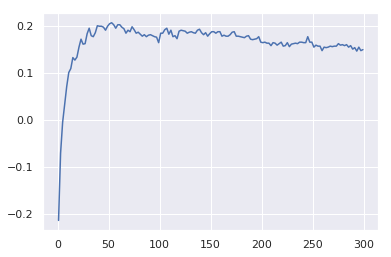

In [15]:
sns.lineplot(data=knn_tests_df['accuracy'])

In [16]:
# Logistic Regressor (Classifier)

log_reg_clf = LogisticRegression(random_state=0, solver='liblinear', max_iter=2000)
log_reg_clf.fit(X_train, y_train)

log_reg_predictions = cross_val_predict(log_reg_clf, X_test, y_test, cv=6)
log_reg_accuracy = r2_score(y_test, log_reg_predictions)
print(log_reg_accuracy) 

0.6457837447439356


In [17]:
print('Scores:')
print('Logistic Regression:     ', log_reg_accuracy)
print('Linear SVC:              ', linear_svc_accuracy)
print('XGBoost Classifier:      ', xgb_accuracy)
print('Random Forest Classifier:', rand_forest_accuracy)
print('K Nearset Neighbors:     ', knn_tests_df.at[51, 'accuracy'])

Scores:
Logistic Regression:      0.6457837447439356
Linear SVC:               0.6478984686559122
XGBoost Classifier:       0.529473929585228
Random Forest Classifier: 0.4047052187786143
K Nearset Neighbors:      0.2038064471408465


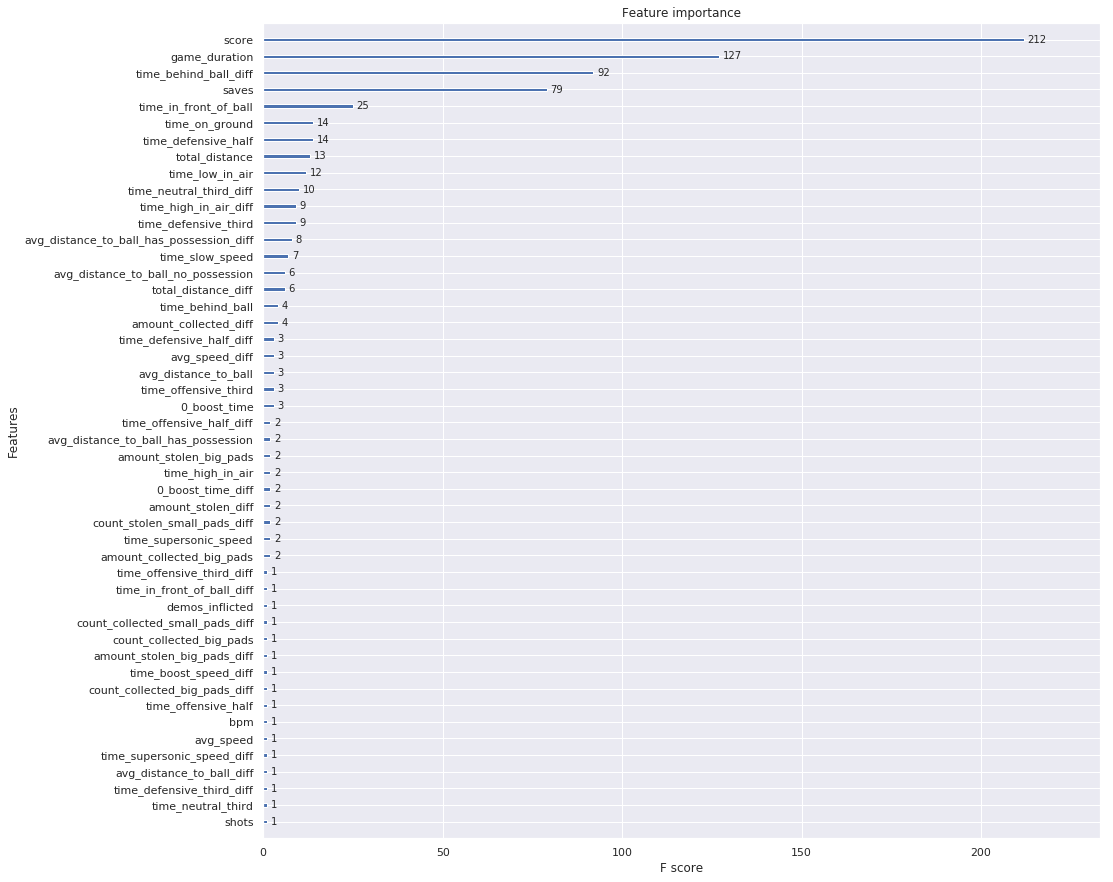

In [18]:
fig, ax = plt.subplots(figsize=(15, 15))
imp_plt = plot_importance(xgbCla, ax=ax)

In [41]:
# 1's
X_train_temp = X_train.drop(['shots', 'time_neutral_third', 'time_defensive_third_diff', 
             'avg_distance_to_ball_diff', 'time_supersonic_speed_diff',
             'avg_speed', 'bpm', 'time_offensive_half', 'count_collected_big_pads_diff',
             'time_boost_speed_diff', 'amount_stolen_big_pads_diff', 'count_collected_big_pads',
             'count_collected_small_pads_diff', 'demos_inflicted', 'time_in_front_of_ball_diff',
             'time_offensive_third_diff'], axis=1)

X_test_temp = X_test.drop(['shots', 'time_neutral_third', 'time_defensive_third_diff', 
             'avg_distance_to_ball_diff', 'time_supersonic_speed_diff',
             'avg_speed', 'bpm', 'time_offensive_half', 'count_collected_big_pads_diff',
             'time_boost_speed_diff', 'amount_stolen_big_pads_diff', 'count_collected_big_pads',
             'count_collected_small_pads_diff', 'demos_inflicted', 'time_in_front_of_ball_diff',
             'time_offensive_third_diff'], axis=1)

In [42]:
log_reg_clf = LogisticRegression(random_state=0, solver='liblinear', max_iter=2000)
log_reg_clf.fit(X_train_temp, y_train)

log_reg_predictions = cross_val_predict(log_reg_clf, X_test, y_test, cv=6)
log_reg_accuracy = r2_score(y_test, log_reg_predictions)
print(log_reg_accuracy) 

0.6457837447439356


In [43]:
# 2's
X_train_temp = X_train_temp.drop(['amount_collected_big_pads', 'time_supersonic_speed',
             'count_stolen_small_pads_diff', 'amount_stolen_diff', '0_boost_time_diff',
             'time_high_in_air', 'amount_stolen_big_pads',
             'avg_distance_to_ball_has_possession', 'time_offensive_half_diff'], axis=1)

X_test_temp = X_test_temp.drop(['amount_collected_big_pads', 'time_supersonic_speed',
             'count_stolen_small_pads_diff', 'amount_stolen_diff', '0_boost_time_diff',
             'time_high_in_air', 'amount_stolen_big_pads',
             'avg_distance_to_ball_has_possession', 'time_offensive_half_diff'], axis=1)

In [44]:
log_reg_clf = LogisticRegression(random_state=0, solver='liblinear', max_iter=2000)
log_reg_clf.fit(X_train_temp, y_train)

log_reg_predictions = cross_val_predict(log_reg_clf, X_test, y_test, cv=6)
log_reg_accuracy = r2_score(y_test, log_reg_predictions)
print(log_reg_accuracy) 

0.6457837447439356


In [45]:
# 3's
X_train_temp = X_train_temp.drop(['0_boost_time', 'time_offensive_third', 'avg_distance_to_ball',
             'avg_speed_diff', 'time_defensive_half_diff'], axis=1)

X_test_temp = X_test_temp.drop(['0_boost_time', 'time_offensive_third', 'avg_distance_to_ball',
             'avg_speed_diff', 'time_defensive_half_diff'], axis=1)

In [46]:
log_reg_clf = LogisticRegression(random_state=0, solver='liblinear', max_iter=2000)
log_reg_clf.fit(X_train_temp, y_train)

log_reg_predictions = cross_val_predict(log_reg_clf, X_test, y_test, cv=6)
log_reg_accuracy = r2_score(y_test, log_reg_predictions)
print(log_reg_accuracy) 

0.6457837447439356


In [47]:
X_train_temp.shape

(15131, 37)

In [49]:
X_train = X_train[['score', 'game_duration', 'time_behind_ball_diff',
                        'saves', 'time_in_front_of_ball', 'time_defensive_half',
                        'time_on_ground', 'total_distance', 'time_low_in_air',
                        'time_neutral_third_diff', 'time_high_in_air_diff',
                        'time_defensive_third', 'avg_distance_to_ball_has_possession_diff',
                        'time_slow_speed', 'avg_distance_to_ball_no_possession',
                        'total_distance_diff', 'amount_collected_diff', 'time_behind_ball']]

X_test = X_test[['score', 'game_duration', 'time_behind_ball_diff',
                        'saves', 'time_in_front_of_ball', 'time_defensive_half',
                        'time_on_ground', 'total_distance', 'time_low_in_air',
                        'time_neutral_third_diff', 'time_high_in_air_diff',
                        'time_defensive_third', 'avg_distance_to_ball_has_possession_diff',
                        'time_slow_speed', 'avg_distance_to_ball_no_possession',
                        'total_distance_diff', 'amount_collected_diff', 'time_behind_ball']]

In [50]:
log_reg_clf = LogisticRegression(random_state=0, solver='liblinear', max_iter=2000)
log_reg_clf.fit(X_train, y_train)

log_reg_predictions = cross_val_predict(log_reg_clf, X_test, y_test, cv=6)
log_reg_accuracy = r2_score(y_test, log_reg_predictions)
print(log_reg_accuracy) 

0.6426116588759709


In [51]:
X_train.shape

(15131, 18)

In [52]:
# export to load in script for easier nueral network testing

X_train.to_hdf('ML_data/champ_X_train.h5', 'X_train')
X_test.to_hdf('ML_data/champ_X_test.h5', 'X_test')

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
y_train.to_hdf('ML_data/champ_y_train.h5', 'y_train')
y_test.to_hdf('ML_data/champ_y_test.h5', 'y_test')

In [71]:
ann = load_model('RL_neural.h5')

y_pred = ann.predict(X_test)
ann_accuracy = r2_score(y_test, y_pred)
print(ann_accuracy)

y_pred_rounded = pd.DataFrame(y_pred)
y_pred_rounded = y_pred_rounded.round()

0.741250950959389
